## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

В данной работе постараемся: 
- изучить российский рынок кинопроката
- выявить текущие тренды
- проанализировать фильмы, получившие государственную поддержку (насколько такие фильмы интересны пользователю)

В анализируемых таблицах следержатся следующие данные: жанр фильма.

|Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений.| Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.|
|-|-|
|- **title** — название фильма;|- **puNumber** — номер прокатного удостоверения;|
|- **puNumber** — номер прокатного удостоверения;| - **box_office** — сборы в рублях.|
|- **show_start_date** — дата премьеры фильма;| |
|- **type** — тип фильма;| |
|- **film_studio** — студия-производитель;| |
|- **production_country** — страна-производитель;| |
|- **director** — режиссёр;| |
|- **producer** — продюсер;| |
|- **age_restriction** — возрастная категория;| |
|- **refundable_support** — объём возвратных средств государственной поддержки;| |
|- **nonrefundable_support** — объём невозвратных средств государственной поддержки;| |
|- **financing_source** — источник государственного финансирования;| |
|- **budget** — общий бюджет фильма;| |
|- **ratings** — рейтинг фильма на КиноПоиске;| |
|- **genres** — жанр фильма.| |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
try:
    movies = pd.read_csv('mkrf_movies.csv')
    shows = pd.read_csv('mkrf_shows.csv')
except:
    movies = pd.read_csv('/datasets/mkrf_movies.csv')
    shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)

In [4]:
movies.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

В датасете Movies 14 колонок и 7486 строк. Большая часть пропущенных значений в строках, связаных с государственной поддержкой. Скорее всего проспуски вязаны с тем, что в прокате присутствует значительное количество иностранного кино, которое не может иметь государственной поддержки. Проверим Эту теорию:

In [6]:
movies.loc[~movies['budget'].isna(), 'production_country'].sort_values().unique()

array(['Россия', 'Россия - Грузия', 'Россия, Армения',
       'Россия, Бельгия, Финляндия', 'Россия, Германия',
       'Россия, Германия, Великобритания',
       'Россия, Германия, Казахстан, Польша, Китай', 'Россия, Италия',
       'Россия, Латвия, Чешская Республика', 'Россия, Сербия',
       'Россия, Украина, Польша', 'Россия, Франция, Латвия',
       'Россия-Китай', 'Россия-Словакия-Чехия', 'Россия-Украина'],
      dtype=object)

Теория подтвердилась, значит можно заполнить пропущенные значения нулями в будущем.

In [7]:
shows.head(3)

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40


In [8]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Перед объединением таблиц `shows` и `movies` необходимо изменить тип данных столбца `puNumber`

In [9]:
movies['puNumber'] = pd.to_numeric(movies['puNumber'], downcast='integer', errors='coerce')

In [10]:
data = movies.merge(shows, on='puNumber', how='left')

In [11]:
data = data.rename(columns={'puNumber':'pu_number'})

Проверим все ли строки вошли в конечный датасет после слияния

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [13]:
data['ratings'] = pd.to_numeric(
                     data['ratings']
                     .map(lambda x: int(x.strip('%'))/10 if '%' in str(x) else x), 
                     errors='raise')

In [14]:
data['age_restriction'].sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

In [15]:
ages = ['0', '12', '6', '16', '18']
for age in ages:
    data['age_restriction'] = data['age_restriction'].apply(lambda x: age if age in x else x)

In [16]:
data['age_restriction'] = pd.to_numeric(data['age_restriction'])

In [17]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'])

In [18]:
#удалим единственный пропуск в стобце, который образовался после преобразования типа данных.
data = data.dropna(subset=['pu_number']) 

In [19]:
data.loc[:, 'pu_number'] = data['pu_number'].astype('int')

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Оценим количетсво пропусков в столбцах в процентах.

In [20]:
data.isna().mean().map(lambda x: f'{round(x, 4) * 100}%')

title                                   0.0%
pu_number                               0.0%
show_start_date                         0.0%
type                                    0.0%
film_studio                            0.24%
production_country                     0.03%
director                               0.12%
producer                               7.59%
age_restriction                         0.0%
refundable_support                    95.56%
nonrefundable_support                 95.56%
budget                                95.56%
financing_source                      95.56%
ratings                               12.91%
genres                                13.03%
box_office               57.809999999999995%
dtype: object

Для оценки состояния дел, выявления зависимости в пропусках и понимания их распределения и количетсва построим теловую карту пропусков для столбцов, в которых они присутствуют.

In [21]:
start_amount = data.shape[0] #запомним начальное количество строк в датасете, чтобы их сравнить ло и после предобработки

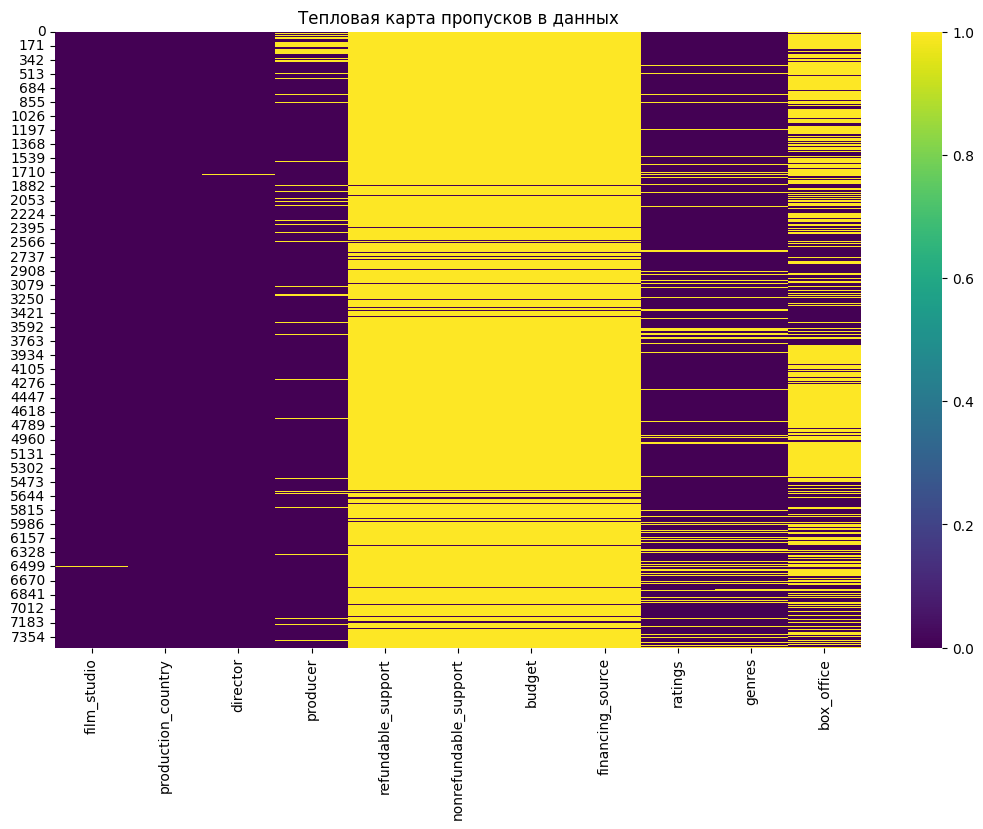

In [22]:
plt.figure(figsize=(13, 8))
sns.heatmap(data.iloc[:, [i for i, n in enumerate(data.columns) if data[n].isna().sum() > 0]].isna(), cmap='viridis')
plt.title('Тепловая карта пропусков в данных')
plt.show()

In [23]:
data.iloc[:, [i for i, n in enumerate(data.columns) if data[n].isna().sum() > 0]].isna().corr()

,film_studio,production_country,director,producer,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
film_studio,1.00,0.17,0.08,-0.00,0.01,0.01,0.01,0.01,0.09,0.09,0.04
production_country,0.17,1.00,0.24,0.03,0.00,0.00,0.00,0.00,-0.01,-0.01,-0.00
director,0.08,0.24,1.00,0.05,0.01,0.01,0.01,0.01,0.06,0.06,0.02
producer,-0.00,0.03,0.05,1.00,0.06,0.06,0.06,0.06,0.03,0.02,0.13
refundable_support,0.01,0.00,0.01,0.06,1.00,1.00,1.00,1.00,0.05,0.05,0.23
nonrefundable_support,0.01,0.00,0.01,0.06,1.00,1.00,1.00,1.00,0.05,0.05,0.23
budget,0.01,0.00,0.01,0.06,1.00,1.00,1.00,1.00,0.05,0.05,0.23
financing_source,0.01,0.00,0.01,0.06,1.00,1.00,1.00,1.00,0.05,0.05,0.23
ratings,0.09,-0.01,0.06,0.03,0.05,0.05,0.05,0.05,1.00,0.99,0.13
genres,0.09,-0.01,0.06,0.02,0.05,0.05,0.05,0.05,0.99,1.00,0.13


Столбцы с пропусками содержат следующие переменные:
- категориальные - студия, режесер, продюссер, жанр, источник финансирования, страна
- количественные - рейтинг, сборы, гос.возвратная поддержка, гос.невозвратная поддержка, бюджет фильма

Пропущенные значений категориальных переменных в столбцах студии, режессера, продюссера, жанра и страны производства можно заполнить значением `'unknown'`. 

Наибольшее количество пропусков в столбцах `refundable_support, nonrefundable_support, budget, financing_source`. Будем считать что если информация отсутствовала, значит фильм не получал государственную поддержку. Заполним пропущенные значения в `refundable_support, nonrefundable_support` нулем. Пропуски в столбце `'financing_source'` заполним фразой "Без финансирования", посколько если финансирования со стороны государства не поступало, значит и источник финансирования будет пропущен. Отсюда и пропуски в столбце.

Рейтинг и жанр в большинстве случаев пропущены одновренменно, о чем свидетельствует тепловая карта и таблица корреляции.
Рейтинг - один из основных атрибутов оценки успешности фильма, на ряду со сборами и заполнение может исказить данные. Объем тоже не малый, целых 13% от общего количетсва значений.

Пропуски в сборах скорее всего являются пропусками не случайными, их нелья ни удалить ввиду их большого количества и заполнить основываясь на имеющихся данных. Также тяжело интерпретировать причину появления пропуска (эта информация отсутствует или сборы отсутствовали вовсе). Пока что оставим все как есть.

In [24]:
zero = ['refundable_support', 'nonrefundable_support']
fin = ['financing_source']
unknown = ['type', 'film_studio', 'director', 'producer', 'genres', 'production_country']

data[zero] = data[zero].fillna(0)
data[fin] = data[fin].fillna('Без финансирования')
data[unknown] = data[unknown].fillna('unknown')

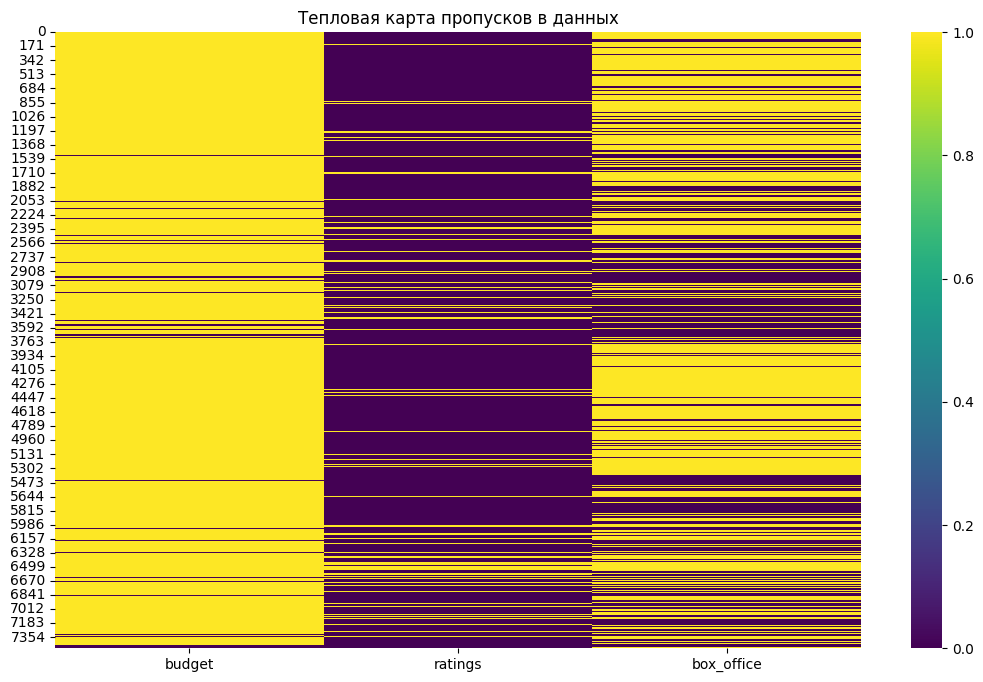

In [25]:
plt.figure(figsize=(13, 8))
sns.heatmap(data.iloc[:, [i for i, n in enumerate(data.columns) if data[n].isna().sum() > 0]].isna(), cmap='viridis')
plt.title('Тепловая карта пропусков в данных')
plt.show()

В оставшихся стобцах пропуски оставим, так как если заполнить их 0, то при посчете значний средних, медианных значений или количетсва информация будет скажена. Более того в стобце бюджета уже присутствуют занчения 0, что также неправдоподобно. Бюджета не может не быть, скорее всего так отражены пропуски в данных.

Логически бюджет фильма складывается из возвратной поддержки, невозвратной поддержки и прочих средств. Даже если фильм был полностью снят на средства из поддержки, бюджет должен равен сумме возвратной поддержки и невозвратной поддержки. 

In [26]:
data.loc[(data['budget'] == 0) | (data['budget'] == np.nan), 'budget'] = \
data.loc[(data['budget'] == 0) | (data['budget'] == np.nan), 'refundable_support'] + \
data.loc[(data['budget'] == 0) | (data['budget'] == np.nan), 'nonrefundable_support']

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Изучим уникальные значения в категориальных переменных

In [27]:
for i in unknown: # ранее использовали эту переменную для заполнения пропусков, в ней содержатся категориальные переменные
    print(f'Уникальные знечения в столбце {i}')
    uni = data[i].sort_values().unique()
    print(uni)
    print(f'Количство уникальных значений {len(uni)}')
    print()

Уникальные знечения в столбце type
[' Анимационный' ' Художественный' 'Анимационный' 'Документальный'
 'Музыкально-развлекательный' 'Научно-популярный' 'Прочие'
 'Художественный']
Количство уникальных значений 8

Уникальные знечения в столбце film_studio
[' АНО "Кинофорум"' ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.'
 ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"' ...
 'ристалл Сити Интертейнмент, Эксклюзив Медиа Групп, Хоуп Таун Интертейнмент, Каппа Андерковар Пикчерз, Скарлет Файр Интертейнмент'
 'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)'
 'юФилм, Твинпикс']
Количство уникальных значений 5491

Уникальные знечения в столбце director
[' Йохан Нийенхейс' ' Н.Орлов, Р.Быков' ' Р.Асхаев' ...
 'хореография Пьера Лакотта по Филиппу Тальони'
 'хореография Фредерика Аштона' 'хореография Фредерика Эштона']
Количство уникальных значений 4812

Уникальные знечения в столбце p

In [28]:
data.duplicated().sum() #проверим наличие явных дубликатов

0

Явные дубликаты отсутствуют. Искать неявные дубликаты в столбцах с информацией о студии, стране, режессере, продюссере, жанре можно, но смысла пока что на этом этапе нет, ввиду большого наличия уникальных значений и комбинаций стран, жанров, студий.

Явно бросается в глаза наличие лишних пробелов у значений в столбце с типом фильма. Также присутствуют они в столбце со страной (СССР с разным количеством пробелов). Обработаем эти значния.

In [29]:
data['type'] = data['type'].str.strip()
data['production_country'] = data['production_country'].str.strip()
data['title'] = data['title'].str.strip('_.')

Прверим также все ли прокатные удостоверения уникальные и встречается ли один и тот же фильм несколько раз.

In [30]:
data[data['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310.00,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",6,0.00,0.00,NaN,Без финансирования,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310.00,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",6,0.00,0.00,NaN,Без финансирования,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410.00,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",6,0.00,0.00,NaN,Без финансирования,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410.00,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",12,0.00,0.00,NaN,Без финансирования,6.80,"комедия,криминал",NaN


Видно что это разные фильмы с почему-то одинаковыми прокатными удостоверениями. Удалять или редактировать эти строки не будем.

Зато в таблице присутствует много дублирующихся фильмов подразными прокатными удостоверениями, их можно объединить оставив первоначальную дату выхода и первое прокатное удостоверение.

In [31]:
box_office_grouped = data[data.duplicated(subset=['title', 'director', 'production_country'], keep=False)] \
                              .sort_values(by='title') \
                              .groupby('title')['box_office'].sum()

In [32]:
def no_dups(row):
    if row['title'] in box_office_grouped.index:
        row['box_office'] = box_office_grouped[row['title']]
    return row

In [33]:
df = data.apply(no_dups, axis=1)

In [34]:
df = df.sort_values(by=['title', 'show_start_date']) \
       .drop_duplicates(subset=['title', 'director', 'production_country'])

In [35]:
df = df.reset_index(drop=True)

В результате данной обработки получилось избавиться от дубликатов фильмов (в этом датасете Особо опасен, Аватар, Ночь живых мертвецов, Гарри Поттер и многие другие), сохранив фильмы с одинаковым названием, например, фильм "Успех". 

In [36]:
print(f'Итоговое количетсво значений прсле обработки пропусков уменьшилось на \
{round((100 - df.shape[0] / start_amount * 100), 2)}% \
\nВ df осталось {df.shape[0]} строк из {start_amount}')

Итоговое количетсво значений прсле обработки пропусков уменьшилось на 9.39% 
В df осталось 6782 строк из 7485


Нулевые значения в столбце со сборами заполним пропусками во избежание искажения информации при провдении математических операций

In [37]:
df.loc[df['box_office'] == 0, 'box_office'] = np.nan

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.


**выполнено ранее в ходе предобработки и анализа пропущенных значений, дубликатов**

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?


**выполнено ранее в ходе предобработки и анализа пропущенных значений, дубликатов**

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [38]:
df.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Я ПРЕПОД,121019018.00,2018-09-06 12:00:00+00:00,Художественный,Яш Радж Филмз,Индия,Сиддхартх Малхотра,Манеш Шарма,12,0.00,0.00,NaN,Без финансирования,7.80,"драма,комедия",145448.00
1,в стиле JAZZ,111001911.00,2011-03-10 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Вертикаль""",Россия,С.Говорухин,"С.Говорухин, А.Просянов",6,0.00,0.00,NaN,Без финансирования,6.10,"мелодрама,комедия",5620.00
2,и я там был,111010013.00,2013-12-13 12:00:00+00:00,Художественный,"ООО ""Продюсерская кинокомпания ""Киностудия ""Луч""",Россия,"А.Зеленков, Л.Биц, А.Муратов","К.Мелик-Авакян, Л.Биц",6,0.00,0.00,NaN,Без финансирования,7.70,"драма,комедия",73180.00


In [39]:
df.insert(3, 'show_start_year', df['show_start_date'].dt.year)

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [40]:
#Я разбил задачу по трем функциям, потому что построчный перебор apply(axis=1) долго работает. 

def directors_name(string): #функия для содания столбца с именем 
    for i in ['.', ',']:
        string = string.replace(i, ' ')
        dir = string.split()
        if len(dir) > 1:
            return dir[0].strip(',. ()')
        else:
            return np.nan
        
def directors_surname(string):  #функия для содания столбца с фамилией 
    for i in ['.', ',']:
        string = string.replace(i, ' ')
        dir = string.split()
        if len(dir) > 1:
            return dir[1].strip(',. ()')
        else:
            return dir[0].strip(',. ()')

def main_genre(string): #функия для содания столбца с основным жанром 
    return string.split(',')[0]

In [41]:
df['directors_name'] = df['director'].map(directors_name)
df['directors_surname'] = df['director'].map(directors_surname)
df['main_genre'] = df['genres'].map(main_genre)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [42]:
df['donation_part'] = round(((df['refundable_support'] + df['nonrefundable_support']) / df['budget'] * 100), 2)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6782 entries, 0 to 6781
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6782 non-null   object             
 1   pu_number              6782 non-null   float64            
 2   show_start_date        6782 non-null   datetime64[ns, UTC]
 3   show_start_year        6782 non-null   int32              
 4   type                   6782 non-null   object             
 5   film_studio            6782 non-null   object             
 6   production_country     6782 non-null   object             
 7   director               6782 non-null   object             
 8   producer               6782 non-null   object             
 9   age_restriction        6782 non-null   int64              
 10  refundable_support     6782 non-null   float64            
 11  nonrefundable_support  6782 non-null   float64          

### Шаг 3. Проведите исследовательский анализ данных


Перед проведение исследовательского анализа данных посмотрим на распределение значений по столбцам с помощью `.hist`

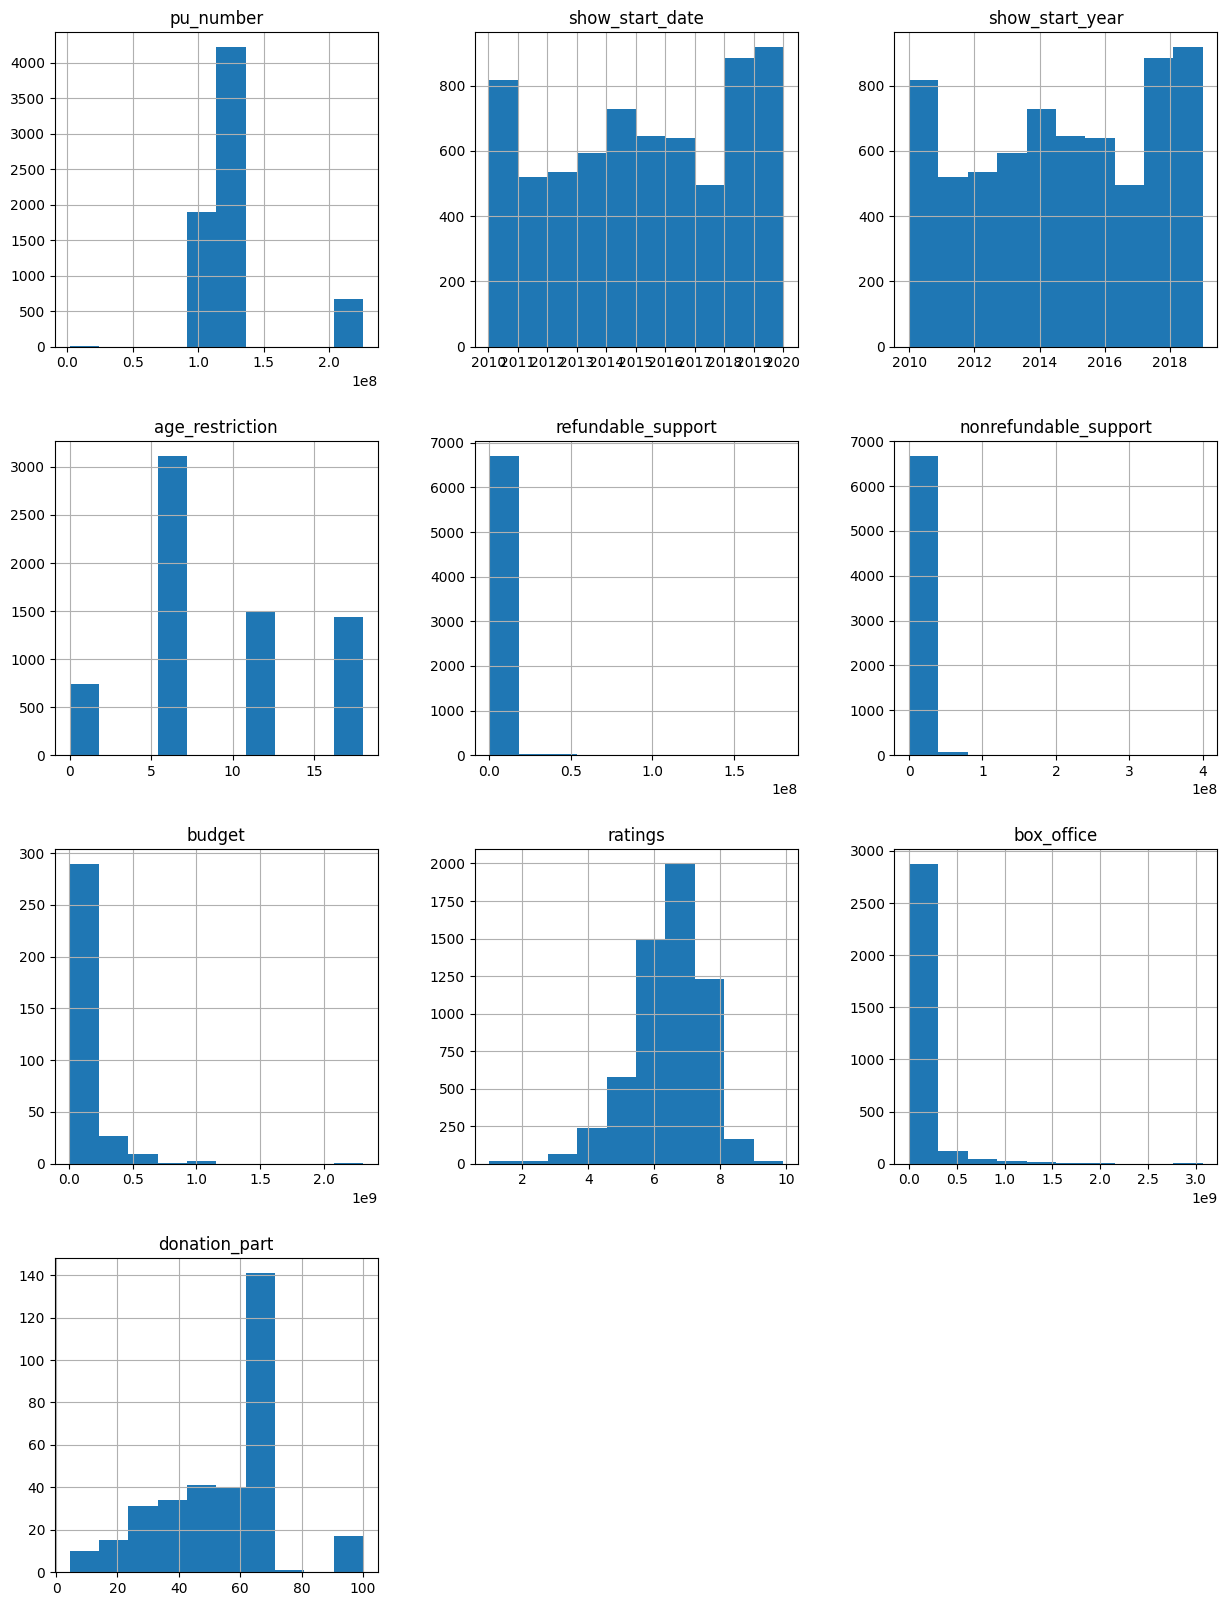

In [44]:
df.hist(figsize=(15, 20));

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [45]:
df['have_inf_box'] = df['box_office'].apply(lambda x: 1 if x > 0 else 0)
df['have_inf_genre'] = df['genres'].apply(lambda x: 1 if x != 'unknown' else 0)

Изучим информацию о том сколько фильмов выходило по годам.

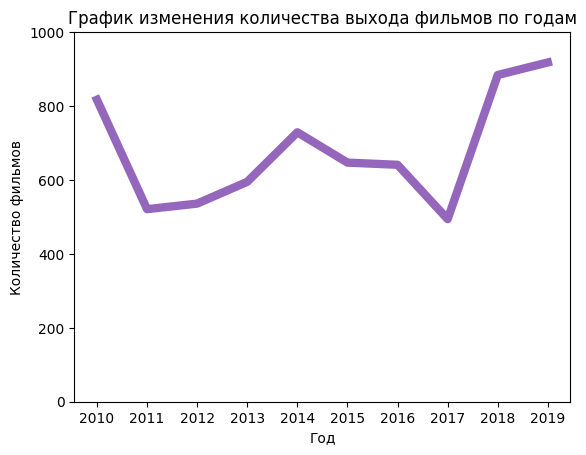

In [46]:
plt.ylim(0, 1000)
df.groupby('show_start_year')['have_inf_genre'].count().plot(linewidth=6, color='C4')
plt.title('График изменения количества выхода фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.xticks(df['show_start_year'].unique())
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

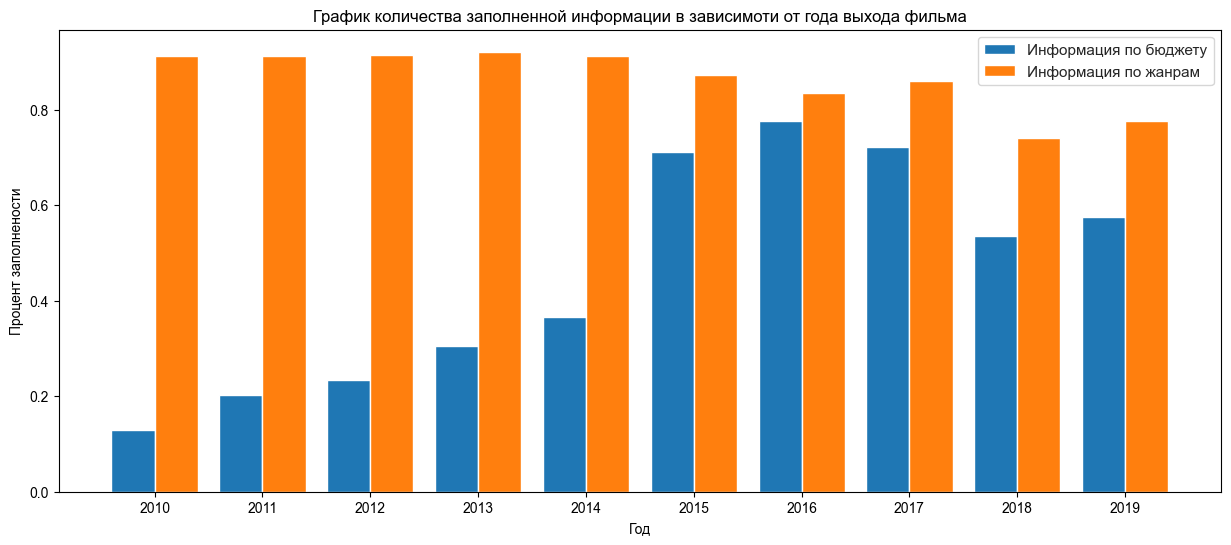

In [47]:
fig, ax = plt.subplots(figsize=(15, 6))

xl = df.groupby('show_start_year')[['have_inf_box', 'have_inf_genre']].mean().reset_index()

sns.set(style="whitegrid")

bar_width = 0.4
index = xl['show_start_year']

plt.bar(index, xl['have_inf_box'], bar_width, label='Информация по бюджету')
plt.bar(index + bar_width, xl['have_inf_genre'], bar_width, label='Информация по жанрам')

plt.title('График количества заполненной информации в зависимоти от года выхода фильма')
plt.xticks(index + bar_width/2, xl['show_start_year'])
plt.xlabel('Год')
plt.ylabel('Процент заполнености')
plt.legend()

have_information = fig

plt.show

С течением времени видна тенденция к уменьшению заполняемости информации по жанрам. Уровень заполненности информации по бюджету фильма с годами растет. Наилучшую заполняемость можно выделить на промежутке с 2015 по 2017 г. Возможно, ухудшение заполненности после 2017 года связано с увеличением количества выходимых фильмов. 

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

В данных до 2015 года суммы сборов значительно отличаются от данных после 2015 года. Исходя из имеющегося набора данных сложно оценить причину возникновения столь сильного отклонения на несколько порядков, потому что колияество фильмов в год занчительно не измениолсь. Группировка в результате объединения дублирующихся фильмов в разных годах тоже не повлияла на выходные данные (я проверял). Даже поправка на изменение курса доллара не сильно исправит ситуацию, потому что средняя сборов до 2014 и после отличается более чем в тысячу раз. Тем более сумма сборов в 10-20 млн.руб. в год кажется совершенно неправдоподобной. В таком случае следует уточнить это у лиц, ответственных за выгрузку, почему так получилось. Возможно неправильно указан порядок или размерность сразу выражается в тыс. или млн. руб. или сумма указана в долларах, а не в рублях.

В результате чего для более наглядного отображения я буду рассматривать фильмы после 2014 года. 

In [48]:
annual_revenue = df.groupby('show_start_year')['box_office'].sum().map(lambda x: x/10**6)
annual_revenue

show_start_year
2010      10.36
2011      15.36
2012       7.74
2013      29.86
2014    7445.01
2015   39496.38
2016   47858.90
2017   48559.05
2018   49657.61
2019   48418.38
Name: box_office, dtype: float64

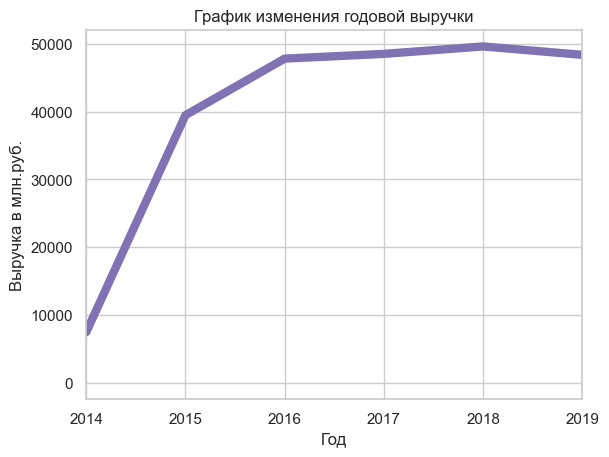

In [49]:
annual_revenue.plot(linewidth=6, color='C4', xlim=(2014, 2019))
plt.title('График изменения годовой выручки')
plt.xlabel('Год')
plt.ylabel('Выручка в млн.руб.')
plt.xticks()
plt.show()

Исходя из имеющегося набора данных можно сделать вывод о том, что выручка с 2016 по 2019 критически не изменялась и варьировалась в пределах 47-49 млрд.руб. 

С 2014 по 2015 можно отметить увеличение выручки в 10 раз.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [50]:
grouped_values = df.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', 'median', 'count'])
grouped_values.columns = ['mean', 'median', 'count']
grouped_values

,mean,median,count
show_start_year,,,
2010,97695.51,2348.00,106
2011,144913.31,3042.50,106
2012,61931.10,6655.00,125
2013,164982.54,3580.00,181
2014,27883942.30,22660.00,267
2015,85861698.17,5104961.45,460
2016,96102199.90,4735373.18,498
2017,136401813.24,10177833.50,356
2018,104762898.76,8821498.98,474


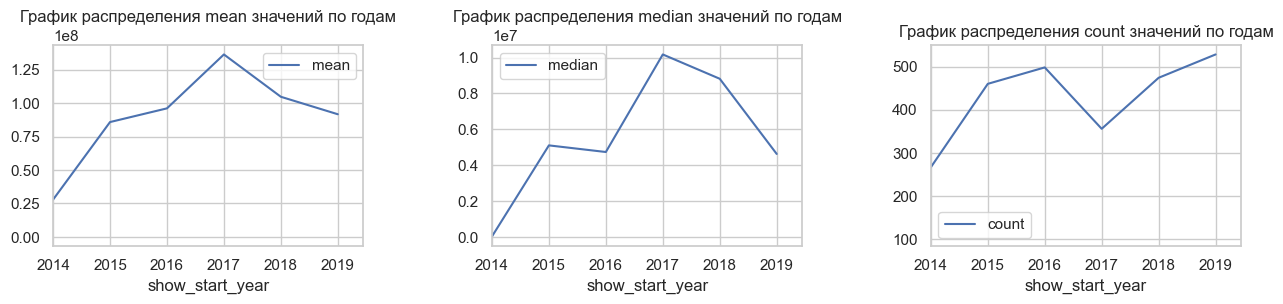

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(14,4))
fig.tight_layout(pad=5)
for i, param in enumerate(grouped_values.columns):
    grouped_values.reset_index().plot(x='show_start_year', y=param, ax=axs[i], title=f'График распределения {param} значений по годам', xlim=2014)
averege_revenue_per_year = fig

При анализе этих графиков видно, что в 2017 году среднее и медианное значнеие выручки было наибольшим по сравнению с остальными годами. Данный фактор мы не заметили ранее при анализе суммы сборов по годам в связи с тем, что 2017 году хоть фильмы и собирали больше, но их количество было меньше, что можно отметить на 3 графике. Графики 1 и 2 *относительно* похожи.

Стоит отметить, что нельзя забывать то, что анализируя вырчуку мы смотрим только на половину всего датасета, потому что половина занчений пропущена. Если бы пропусков в данных было меньше, то, возможно, и результат был бы другой.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [52]:
age_box_office = df[df['show_start_year'] >= 2014] \
                .pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc='mean') \
                .apply(lambda x: x/10**6)
age_box_office = age_box_office.reset_index()
age_box_office

age_restriction,show_start_year,0,6,12,18
0,2014,10.43,21.46,32.31,49.10
1,2015,10.53,91.22,189.11,41.15
2,2016,4.25,120.66,158.43,45.90
3,2017,76.53,186.83,191.50,65.66
4,2018,6.49,119.27,212.94,48.94
5,2019,5.92,98.86,149.18,55.88


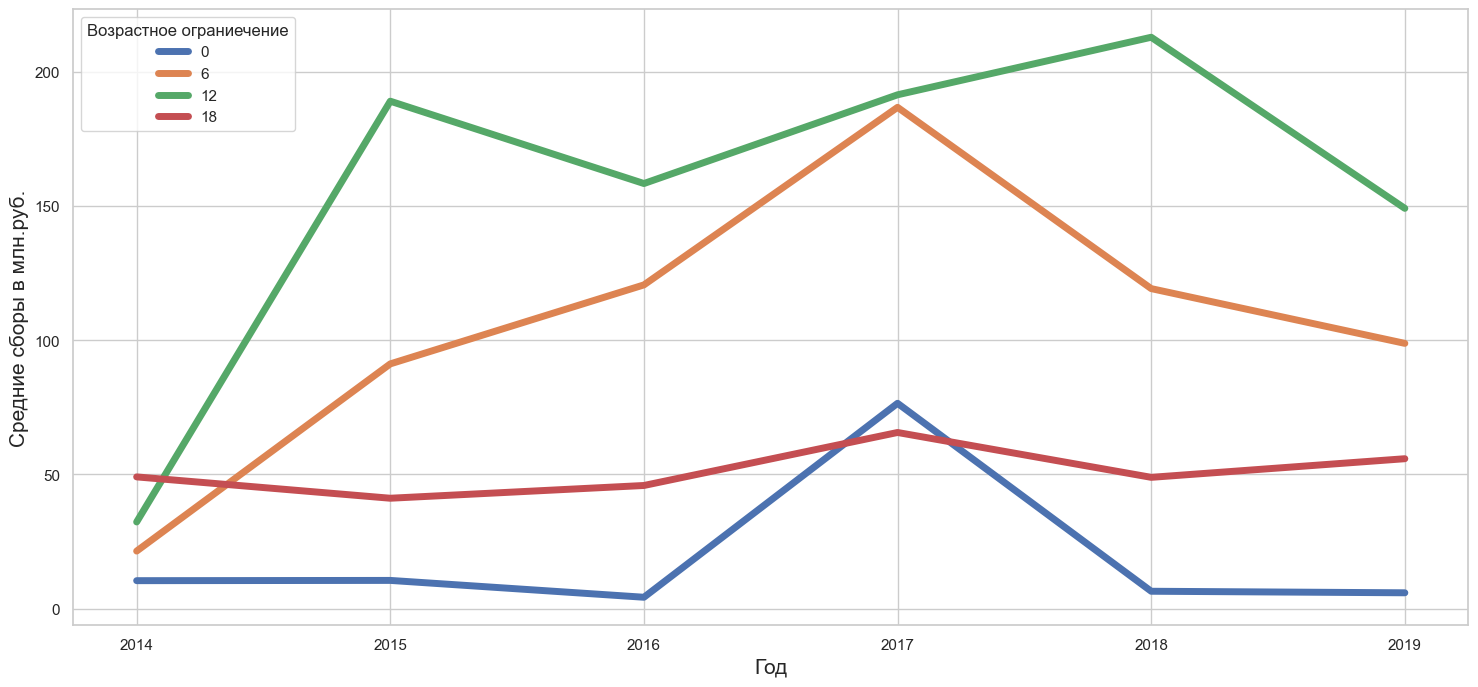

In [53]:
fig, axs = plt.subplots(1, 1, figsize=(18,8), sharex=True)
for i in [0, 6, 12, 18]:
    age_box_office.plot(x='show_start_year', y=i, ax=axs, linewidth=5, grid=True)
axs.set_xlabel('Год', fontsize=15)
axs.set_ylabel('Средние сборы в млн.руб.', fontsize=15)
axs.legend(title='Возрастное ограниечение')
plt.show()

В среднем на протяжении видимого отрезка времени можно составить **ТОП** фильмов по сборам в зависимости от возрастного ограничеия:
1) 12+
2) 6+
3) 18+
4) 0+

Исключением станет 2017 год, в котором фильмы формата 0+ собрали в среднем больше чем фильмы 18+ и 2014 год, в котором фильмы 18+ в среднем стали сами кассовыми. 

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Для исследования фильмов, которые получили государственную поддержку, создадим в отдельную перемнную чать датасета, в которой присутствует интересующая нас информация.

In [54]:
df_government_fin = df[df['donation_part'] > 0].copy()

Одним из наиболее важных критериев оценки фильма помимо рейтинга можно считать окупаемость (которая напряму вытекает из объемов сборов фильма). Под окупаемостью будем подразумевать отношение общих сборов к затраченному бюджету фильма.

- success_rate **< 1** - провал, фильм не окупился и потратил на производство себя больше, чем смог заработать.
- success_rate **> 1** - уже лучше

In [55]:
df_government_fin['success_rate'] = df_government_fin['box_office'] / df_government_fin['budget']

Проверим теорию о том, что Министерство культуры выдает всегда безвозвратную поддержку:

In [56]:
df_government_fin[(df_government_fin['financing_source'] == 'Министерство культуры') & (df_government_fin['refundable_support']>0)]

,title,pu_number,show_start_date,show_start_year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,directors_name,directors_surname,main_genre,donation_part,have_inf_box,have_inf_genre,success_rate


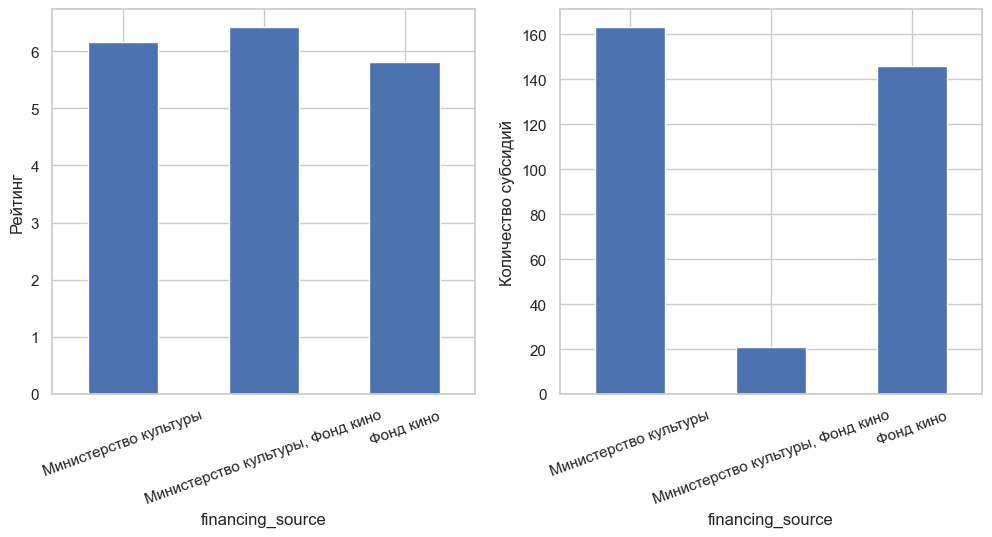

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

df_government_fin.groupby('financing_source')['ratings'].mean().plot(kind='bar', ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=20)
axs[0].set_ylabel('Рейтинг')

df_government_fin.groupby('financing_source')['refundable_support'].count().plot(kind='bar', ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=20)
axs[1].set_ylabel('Количество субсидий')

plt.show()

Данный график отображает средний рейтинг и количество субсидий в зависимости от источника финансирования. Как видно вне зависимости от источника финансирования средний рейтинг у фильмов с государственной поддержной всегда примерное одинаков. Министерство культуры и Фонд кино с одинаковой частотой выдают субсидии.

In [58]:
def source_type(row):
    if row['refundable_support'] > 0 and row['nonrefundable_support'] > 0:
        return 'Комбинированная поддержка'
    elif row['refundable_support'] > 0 and row['nonrefundable_support'] == 0: 
        return 'Возвратная поддержка'
    elif row['refundable_support'] == 0 and row['nonrefundable_support'] > 0: 
        return 'Невозвратная поддержка'
    elif row['refundable_support'] == 0 and row['nonrefundable_support'] == 0: 
        return 'Без государственной поддержки'

Введем новый столбец *source_type*, показывающий типо поддержки для выявления зависимости (при ее наличии) типа поддержки от рейтинга фильма

In [59]:
df_government_fin['source_type'] = df_government_fin.apply(source_type, axis=1)

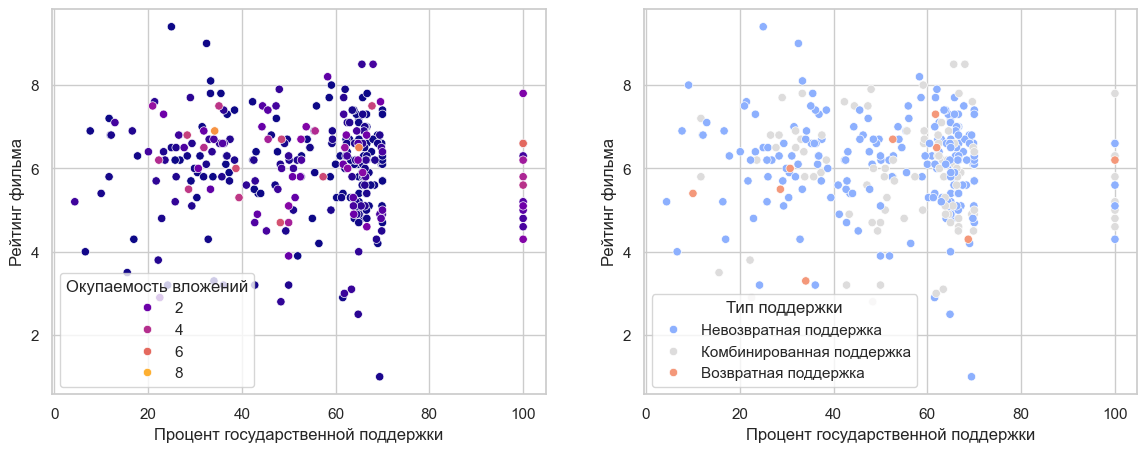

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(data=df_government_fin.sort_values(by='success_rate')
                                      .query("success_rate<10"), 
                x='donation_part', 
                y='ratings', 
                hue='success_rate', 
                palette="plasma", 
                ax=axs[0])
axs[0].set_xlabel('Процент государственной поддержки')
axs[0].set_ylabel('Рейтинг фильма') 
legend0 = axs[0].legend()
legend0.set_title('Окупаемость вложений')


sns.scatterplot(data=df_government_fin.sort_values(by='success_rate'),
                x='donation_part', 
                y='ratings', 
                hue='source_type', 
                palette="coolwarm", 
                ax=axs[1])
plt.xlabel('Процент государственной поддержки')
plt.ylabel('Рейтинг фильма') 
legend1 = axs[1].legend()
legend1.set_title('Тип поддержки')

rate_persent = fig

plt.show()

Данные графики покагают выявить неочивидную зависимость между наиболее интересными для нас факторами, такими как рейтинг фильма, процент государственной поддержки, окупаемостью фильма и типо гос.поддержки. Можно заметить, что четкой зависимости рейтинга фильма от процента государственной поддерждки, источника его финансирования или типа государственной поддержки не выявлено, наиболее часто выделяется около 60% от бюджета фильма. Зачастую это либо комбинированная, либо невозвратная поддержка.

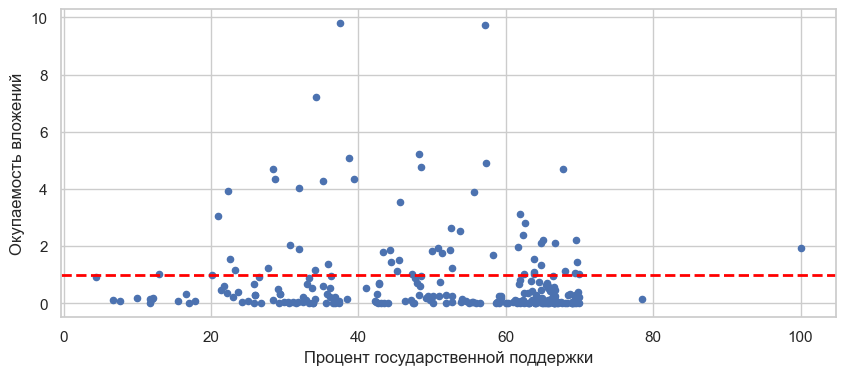

In [61]:
df_government_fin.groupby('donation_part')['success_rate'] \
                 .mean() \
                 .reset_index() \
                 .plot(x='donation_part', 
                       y='success_rate', 
                       kind='scatter', 
                       xlabel='Процент государственной поддержки', 
                       ylabel='Окупаемость вложений', 
                       figsize=(10, 4))

plt.axhline(y=1, color='red', linestyle='--', linewidth=2)

plt.show()

К сожалению, здесь мы можем наблюдать, что большая часть фильмов с государственной поддержкой с трудом окупают свое производство, не говоря уже о прибыли. Основное скопление точек на графике ниже отметки y=1 (отмечена красной линией)

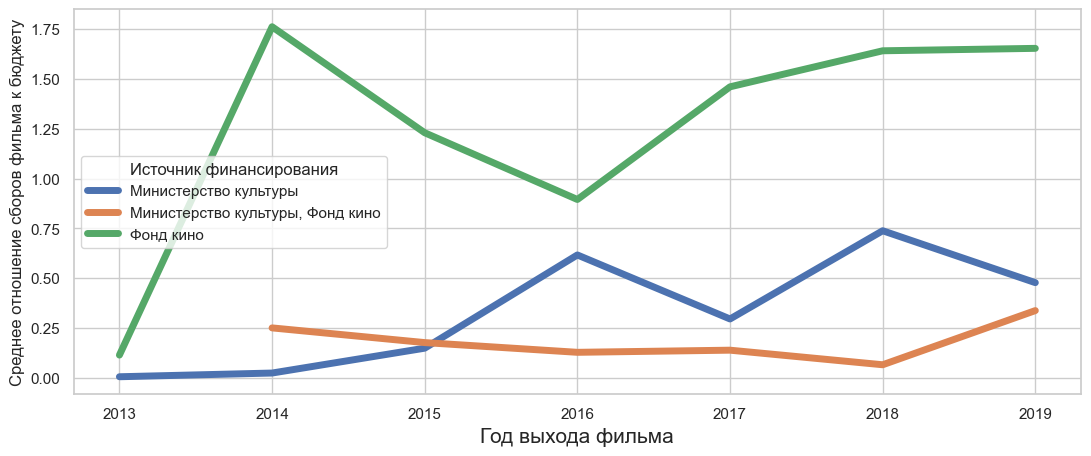

In [62]:
pt = df_government_fin.pivot_table(index='show_start_year', columns='financing_source', values='success_rate', aggfunc='mean')

fig, axs = plt.subplots(1, 1, figsize=(13,5), sharex=True)
for i in pt.columns:
    pt.reset_index().plot(x='show_start_year', y=i, ax=axs, linewidth=5, grid=True)
axs.set_xlabel('Год выхода фильма', fontsize=15)
axs.set_ylabel('Среднее отношение сборов фильма к бюджету', fontsize=12)
axs.legend(title='Источник финансирования')

graph_success_rate = fig

plt.show()

Здесь отражена доходность по годам в зависимости от источников финансирования. Бессменным лидером является фонд кино. Хуже - министерство культуры. Стоит вспомнить министерство культуры дает деньги безвозвратно. 

На основании этого можно сделать несложный вывод о том, что если деньги нужно отдавать, то и стремление заработать будет выше.

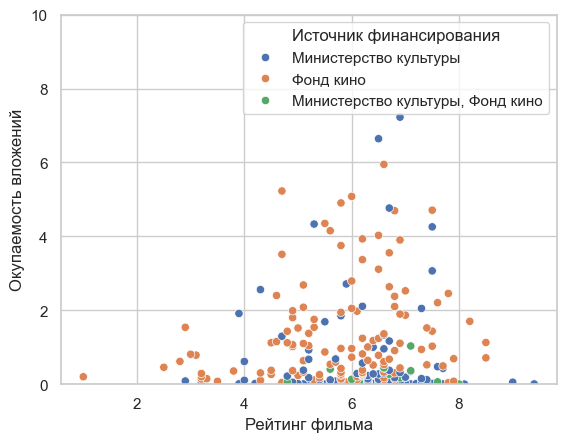

In [63]:
sns.scatterplot(data=df_government_fin.sort_values(by='success_rate'), x='ratings', y='success_rate', hue='financing_source')
plt.ylim(0, 10) #Отфильтруем значения для наиболее наглядной визуализации
plt.xlabel('Рейтинг фильма')
plt.ylabel('Окупаемость вложений')
plt.legend(title='Источник финансирования')
fig = plt.gcf()
graph_success_rating = fig

Зависимость рейтинга фильма от его окупаемости фильма напоминает нормальное распределение с центром в 6 баллов (средняя оценка фильма)

In [64]:
df_government_fin['have_refundable_support'] = df_government_fin['refundable_support'].map(lambda x: 1 if x > 0 else 0)
df_government_fin['have_nonrefundable_support'] = df_government_fin['nonrefundable_support'].map(lambda x: 1 if x > 0 else 0)

In [65]:
support = df_government_fin.groupby('show_start_year')[['refundable_support', 'nonrefundable_support']] \
                           .sum() \
                           .reset_index() \
                           .melt(id_vars='show_start_year', var_name='support_type', value_name='amount')

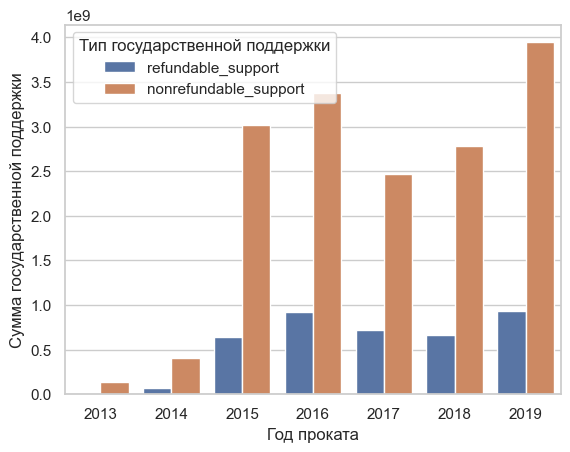

In [66]:
sns.barplot(data=support, x='show_start_year', y='amount', hue='support_type')
plt.xlabel('Год проката')
plt.ylabel('Сумма государственной поддержки')
plt.legend(title='Тип государственной поддержки')

sum_gov_support = plt.gcf()

С течением времени наблюдется тенденция к увеличению государственной поддержки фильмов. Размер возвратной и невовратной поддержки растет и убывает пропорционально.

### Шаг 5. Напишите общий вывод

В ходе данной работы были изучены данные о российском кинопрокате.

Для анализа были объединены два датафрейма с информацией о кинофильмах и их сборах. 

В ходе предобработки данных были обработаны пропущенных значения там, где это было возможно, каждому столбце был присвоен подходящий тип данных.

Наибольшее количество пропусков было в столбцах, связанных с государственной поддержкой. Пропуски заполнены там, где это возможно и наоборот добавлены вместо 0 значений, во избежание искажения информации при проведении математических операций

При обработке дубликатов явные дубликаты отсутствовали, неявные дубликаты обработаны в столбцах с названиями фильма, страной производства и типом.

Наибольшее количество фильмов выходило в 2010, 2018 и 2019 годах. При анализе качества заполненности была выявлена тенденция к улучшению заполненности информации по бюджету фильмов и ухудшению заполненности информации по жанрам. Ниже приведен график.

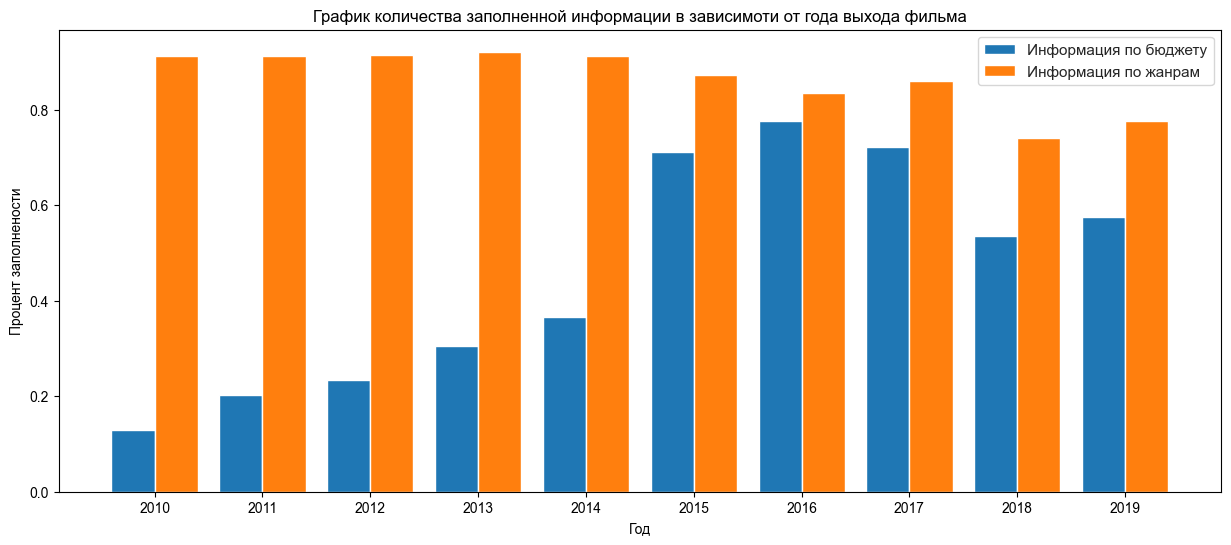

In [67]:
have_information

При анализе этих графиков видно, что в 2017 году среднее и медианное значнеие выручки было наибольшим по сравнению с остальными годами. Стоит отметить, что нельзя забывать то, что анализируя вырчуку мы смотрим только на половину всего датасета, потому что половина занчений пропущена. Если бы пропусков в данных было меньше, то, возможно, и результат был бы другой.

Наиболее кассовыми оказалсь фильмы с рейтингом 6+ и 12+.

За визуализацией распределения занчений при анализе фильмов, получивших государственную поддержку, можно выделить несколько тезисов:
1) Министерство культуры и фонд кино почти одинаково часто субсидируют фильмы, реже совместно.
2) Министерство культуры выдает только невозвратную поддержку, в то время как фонд кино оба типа поддержки;
3) Чаще всего государственная поддержка составляет около 60% от общего бюджета фильма.
4) 6 баллов - средная оценка фильмов, имеющих государственную поддержку. Наиболее часто занчения распределяются от 4 до 8 баллов.
5) Четкой зависимости рейтинга фильма от процента государственной поддерждки, источника его финансирования или типа государственной поддержки не выявлено.
6) Можно отметить что фильмы с гос.поддержкой в целом редко являются прибыльными. Наилучшие результаты показывает фонд кино. Фильмы, которые он финансирует чаще собирают больше, чем тратится на их производство.
7) С течением времени наблюдется тенденция к увеличению государственной поддержки фильмов. Размер возвратной и невовратной поддержки растет и убывает пропорционально.

Основные графики приведены ниже.

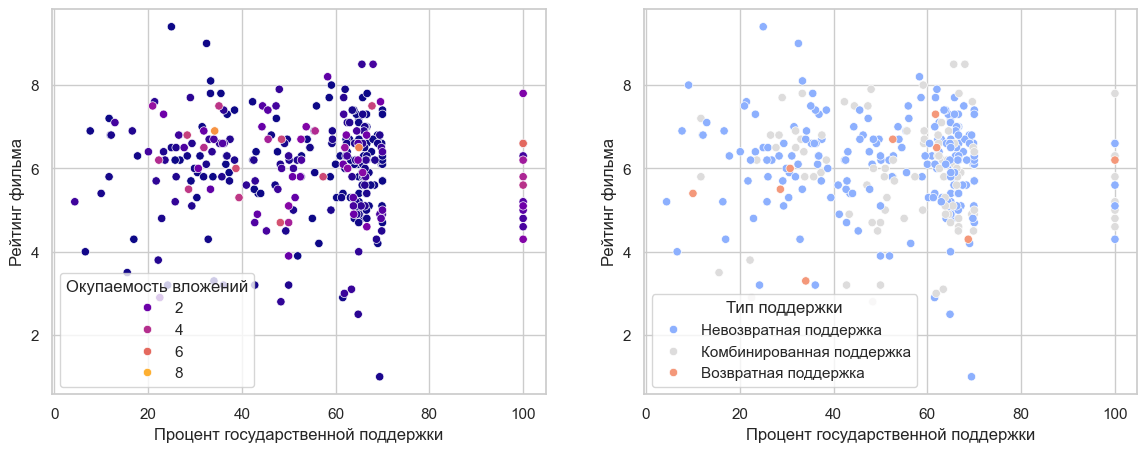

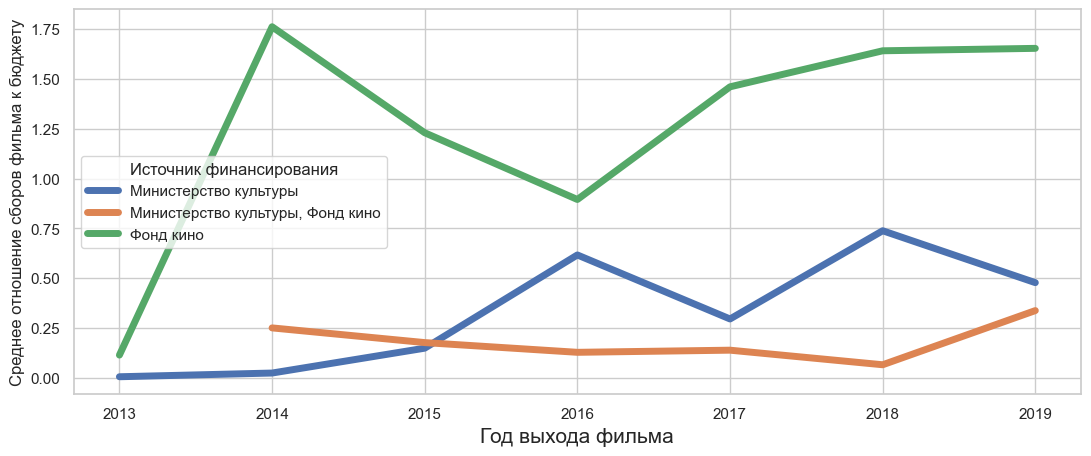

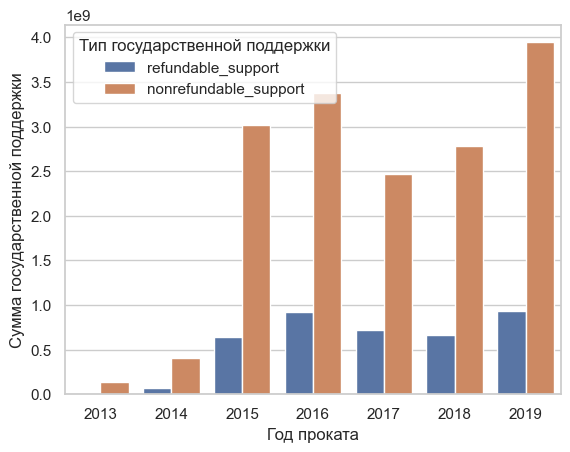

In [68]:
display(rate_persent)  
display(graph_success_rate)  
display(sum_gov_support)  